<a href="https://colab.research.google.com/github/Jie-123sh/InstantMesh_jupyter.ipynb/blob/main/InstantMesh_jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content
!GIT_LFS_SKIP_SMUDGE=1 git clone -b dev https://github.com/camenduru/InstantMesh
%cd /content/InstantMesh

!pip install pytorch-lightning==2.1.2 gradio==3.50.2 einops omegaconf torchmetrics webdataset accelerate tensorboard
!pip install PyMCubes trimesh rembg transformers diffusers==0.20.2 bitsandbytes imageio[ffmpeg] xatlas plyfile
!pip install git+https://github.com/NVlabs/nvdiffrast jax==0.4.19 jaxlib==0.4.19 ninja
!pip install onnxruntime
!pip install --upgrade huggingface_hub
!pip install --upgrade diffusers huggingface_hub pytorch_lightning einops
!pip install --upgrade diffusers
!pip install --upgrade pytorch_lightning einops
!pip install --upgrade jax jaxlib
!pip install --upgrade jax jaxlib==0.4.10+cuda118 -f https://storage.googleapis.com/jax-releases/jax_releases.html
!pip uninstall diffusers -y
!pip install diffusers

/content
fatal: destination path 'InstantMesh' already exists and is not an empty directory.
/content/InstantMesh
  Using cached pytorch_lightning-2.1.2-py3-none-any.whl.metadata (21 kB)
Using cached pytorch_lightning-2.1.2-py3-none-any.whl (776 kB)
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 2.5.1
    Uninstalling pytorch-lightning-2.5.1:
      Successfully uninstalled pytorch-lightning-2.5.1
  Using cached diffusers-0.20.2-py3-none-any.whl
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.33.1
    Uninstalling diffusers-0.33.1:
      Successfully uninstalled diffusers-0.33.1
  Cloning https://github.com/NVlabs/nvdiffrast to /tmp/pip-req-build-jl7x1n8k
  Running command git clone --filter=blob:none --quiet https://github.com/NVlabs/nvdiffrast /tmp/pip-req-build-jl7x1n8k
  Resolved https://github.com/NVlabs/nvdiffrast to commit 729261dc64c4241ea36efda84fbf532cc8b425b8
  Preparing metadata (setup.py) ... done


/content/InstantMesh
diffusers version: 0.33.1
huggingface_hub version: 0.30.2


/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(


jax version: 0.6.0
diffusers version: 0.33.1


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/2.63k [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/681M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/391 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/708 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/369 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/672 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/745 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/8 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

INFO:lightning_fabric.utilities.seed:Seed set to 0
100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 270GB/s]
INFO:lightning_fabric.utilities.seed:Seed set to 42


  0%|          | 0/75 [00:00<?, ?it/s]

<ipython-input-2-35c68d1d0f81>:52: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:203.)
  show_image = torch.from_numpy(show_image)     # (960, 640, 3)


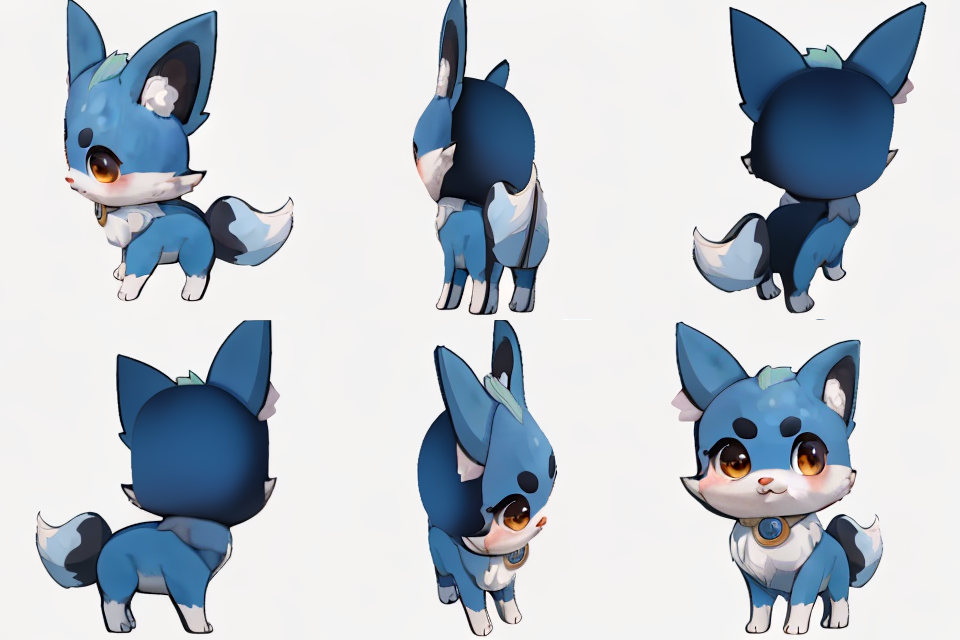

In [2]:
%cd /content/InstantMesh

import torch
model = None
torch.cuda.empty_cache()

import diffusers
import huggingface_hub
print("diffusers version:", diffusers.__version__)
print("huggingface_hub version:", huggingface_hub.__version__)

import jax
import diffusers

print("jax version:", jax.__version__)
print("diffusers version:", diffusers.__version__)

import numpy as np
import rembg
from PIL import Image
from pytorch_lightning import seed_everything
from einops import rearrange
from diffusers import DiffusionPipeline, EulerAncestralDiscreteScheduler
from huggingface_hub import hf_hub_download
from src.utils.infer_util import remove_background, resize_foreground

pipeline = DiffusionPipeline.from_pretrained("sudo-ai/zero123plus-v1.2", custom_pipeline="zero123plus",torch_dtype=torch.float16,)
pipeline.scheduler = EulerAncestralDiscreteScheduler.from_config(pipeline.scheduler.config, timestep_spacing='trailing')
unet_ckpt_path = hf_hub_download(repo_id="TencentARC/InstantMesh", filename="diffusion_pytorch_model.bin", repo_type="model")
state_dict = torch.load(unet_ckpt_path, map_location='cpu')
pipeline.unet.load_state_dict(state_dict, strict=True)
device = torch.device('cuda')
pipeline = pipeline.to(device)
seed_everything(0)

def preprocess(input_image, do_remove_background):
    rembg_session = rembg.new_session() if do_remove_background else None
    if do_remove_background:
        input_image = remove_background(input_image, rembg_session)
        input_image = resize_foreground(input_image, 0.85)
    return input_image

def generate_mvs(input_image, sample_steps, sample_seed):
    seed_everything(sample_seed)
    generator = torch.Generator(device=device)
    z123_image = pipeline(
        input_image,
        num_inference_steps=sample_steps,
        generator=generator,
    ).images[0]
    show_image = np.asarray(z123_image, dtype=np.uint8)
    show_image = torch.from_numpy(show_image)     # (960, 640, 3)
    show_image = rearrange(show_image, '(n h) (m w) c -> (n m) h w c', n=3, m=2)
    show_image = rearrange(show_image, '(n m) h w c -> (n h) (m w) c', n=2, m=3)
    show_image = Image.fromarray(show_image.numpy())
    return z123_image, show_image

input_image_path = '/content/InstantMesh/examples/blue_cat.png' #@param {type:"string"}
input_image = Image.open(input_image_path)
processed_image = preprocess(input_image, True)
processed_image
mv_images, mv_show_images = generate_mvs(processed_image, 75, 42)
mv_images.save('/content/InstantMesh/mv_images.png')
mv_show_images

In [3]:
%cd /content/InstantMesh

import torch
pipeline = None
torch.cuda.empty_cache()

import os
from torchvision.transforms import v2
from huggingface_hub import hf_hub_download
from omegaconf import OmegaConf
from PIL import Image
import numpy as np
from einops import rearrange, repeat
import tempfile
from tqdm import tqdm
import imageio

from src.utils.train_util import instantiate_from_config
from src.utils.camera_util import (FOV_to_intrinsics, get_zero123plus_input_cameras,get_circular_camera_poses,)
from src.utils.mesh_util import save_obj, save_obj_with_mtl

config_path = 'configs/instant-mesh-base.yaml'
config = OmegaConf.load(config_path)
config_name = os.path.basename(config_path).replace('.yaml', '')
model_config = config.model_config
infer_config = config.infer_config
model_ckpt_path = hf_hub_download(repo_id="TencentARC/InstantMesh", filename="instant_mesh_base.ckpt", repo_type="model")
model = instantiate_from_config(model_config)
state_dict = torch.load(model_ckpt_path, map_location='cpu')['state_dict']
state_dict = {k[14:]: v for k, v in state_dict.items() if k.startswith('lrm_generator.') and 'source_camera' not in k}
model.load_state_dict(state_dict, strict=True)
device = torch.device('cuda')
model = model.to(device)
IS_FLEXICUBES = True if config_name.startswith('instant-mesh') else False
if IS_FLEXICUBES:
    model.init_flexicubes_geometry(device, fovy=30.0)
model = model.eval()

def images_to_video(images, output_path, fps=30):
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    frames = []
    for i in range(images.shape[0]):
        frame = (images[i].permute(1, 2, 0).cpu().numpy() * 255).astype(np.uint8).clip(0, 255)
        assert frame.shape[0] == images.shape[2] and frame.shape[1] == images.shape[3], \
            f"Frame shape mismatch: {frame.shape} vs {images.shape}"
        assert frame.min() >= 0 and frame.max() <= 255, \
            f"Frame value out of range: {frame.min()} ~ {frame.max()}"
        frames.append(frame)
    imageio.mimwrite(output_path, np.stack(frames), fps=fps, codec='h264')

def get_render_cameras(batch_size=1, M=120, radius=2.5, elevation=10.0, is_flexicubes=False):
    c2ws = get_circular_camera_poses(M=M, radius=radius, elevation=elevation)
    if is_flexicubes:
        cameras = torch.linalg.inv(c2ws)
        cameras = cameras.unsqueeze(0).repeat(batch_size, 1, 1, 1)
    else:
        extrinsics = c2ws.flatten(-2)
        intrinsics = FOV_to_intrinsics(30.0).unsqueeze(0).repeat(M, 1, 1).float().flatten(-2)
        cameras = torch.cat([extrinsics, intrinsics], dim=-1)
        cameras = cameras.unsqueeze(0).repeat(batch_size, 1, 1)
    return cameras

def make_mesh(mesh_fpath, planes):
    mesh_basename = os.path.basename(mesh_fpath).split('.')[0]
    mesh_dirname = os.path.dirname(mesh_fpath)
    mesh_vis_fpath = os.path.join(mesh_dirname, f"{mesh_basename}.glb")
    with torch.no_grad():
        mesh_out = model.extract_mesh(planes, use_texture_map=True, **infer_config,)
        vertices, faces, uvs, mesh_tex_idx, tex_map = mesh_out
        # vertices = vertices[:, [1, 2, 0]]
        # vertices[:, -1] *= -1
        # faces = faces[:, [2, 1, 0]]
        save_obj_with_mtl(
            vertices.data.cpu().numpy(),
            uvs.data.cpu().numpy(),
            faces.data.cpu().numpy(),
            mesh_tex_idx.data.cpu().numpy(),
            tex_map.permute(1, 2, 0).data.cpu().numpy(),
            mesh_fpath,
        )
        print(f"Mesh with texmap saved to {mesh_fpath}")
        # vertices, faces, vertex_colors = mesh_out
        # vertices = vertices[:, [1, 2, 0]]
        # vertices[:, -1] *= -1
        # faces = faces[:, [2, 1, 0]]
        # save_obj(vertices, faces, vertex_colors, mesh_fpath)
        # print(f"Mesh saved to {mesh_fpath}")
    return mesh_fpath

def make3d(images):
    images = np.asarray(images, dtype=np.float32) / 255.0
    images = torch.from_numpy(images).permute(2, 0, 1).contiguous().float()     # (3, 960, 640)
    images = rearrange(images, 'c (n h) (m w) -> (n m) c h w', n=3, m=2)        # (6, 3, 320, 320)
    input_cameras = get_zero123plus_input_cameras(batch_size=1, radius=4.0).to(device)
    render_cameras = get_render_cameras(
        batch_size=1, radius=4.5, elevation=20.0, is_flexicubes=IS_FLEXICUBES).to(device)
    images = images.unsqueeze(0).to(device)
    images = v2.functional.resize(images, (320, 320), interpolation=3, antialias=True).clamp(0, 1)
    directory = '/content/tmp'
    if not os.path.exists(directory):
        os.makedirs(directory)
    tempfile.tempdir = directory
    mesh_fpath = tempfile.NamedTemporaryFile(suffix=f".obj", delete=False).name
    print(mesh_fpath)
    mesh_basename = os.path.basename(mesh_fpath).split('.')[0]
    mesh_dirname = os.path.dirname(mesh_fpath)
    video_fpath = os.path.join(mesh_dirname, f"{mesh_basename}.mp4")
    with torch.no_grad():
        planes = model.forward_planes(images, input_cameras)
        chunk_size = 20 if IS_FLEXICUBES else 1
        render_size = 384
        frames = []
        for i in tqdm(range(0, render_cameras.shape[1], chunk_size)):
            if IS_FLEXICUBES:
                frame = model.forward_geometry(planes, render_cameras[:, i:i+chunk_size], render_size=render_size,)['img']
            else:
                frame = model.synthesizer(planes, cameras=render_cameras[:, i:i+chunk_size],render_size=render_size,)['images_rgb']
            frames.append(frame)
        frames = torch.cat(frames, dim=1)
        images_to_video(frames[0], video_fpath, fps=30,)
        print(f"Video saved to {video_fpath}")
    mesh_fpath = make_mesh(mesh_fpath, planes)
    return video_fpath, mesh_fpath

mv_images = Image.open('/content/InstantMesh/mv_images.png')
output_video, output_model_obj = make3d(mv_images)
!cp -f {output_video} /content/InstantMesh/output_video.mp4
!cp -f {output_model_obj} /content/InstantMesh/output_model.obj
from IPython.display import Video
Video(output_video, embed=True)

/content/InstantMesh


Some weights of ViTModel were not initialized from the model checkpoint at facebook/dino-vitb16 and are newly initialized: ['encoder.layer.0.adaLN_modulation.1.bias', 'encoder.layer.0.adaLN_modulation.1.weight', 'encoder.layer.1.adaLN_modulation.1.bias', 'encoder.layer.1.adaLN_modulation.1.weight', 'encoder.layer.10.adaLN_modulation.1.bias', 'encoder.layer.10.adaLN_modulation.1.weight', 'encoder.layer.11.adaLN_modulation.1.bias', 'encoder.layer.11.adaLN_modulation.1.weight', 'encoder.layer.2.adaLN_modulation.1.bias', 'encoder.layer.2.adaLN_modulation.1.weight', 'encoder.layer.3.adaLN_modulation.1.bias', 'encoder.layer.3.adaLN_modulation.1.weight', 'encoder.layer.4.adaLN_modulation.1.bias', 'encoder.layer.4.adaLN_modulation.1.weight', 'encoder.layer.5.adaLN_modulation.1.bias', 'encoder.layer.5.adaLN_modulation.1.weight', 'encoder.layer.6.adaLN_modulation.1.bias', 'encoder.layer.6.adaLN_modulation.1.weight', 'encoder.layer.7.adaLN_modulation.1.bias', 'encoder.layer.7.adaLN_modulation.1.w

/content/tmp/tmphzg15eit.obj


  0%|          | 0/6 [00:00<?, ?it/s]/content/InstantMesh/src/models/geometry/render/neural_render.py:51: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at /pytorch/aten/src/ATen/native/Cross.cpp:62.)
  face_normals = torch.cross(v1 - v0, v2 - v0)
100%|██████████| 6/6 [00:09<00:00,  1.55s/it]


Video saved to /content/tmp/tmphzg15eit.mp4
Mesh with texmap saved to /content/tmp/tmphzg15eit.obj
